<a href="https://colab.research.google.com/github/ithabi/AAA/blob/main/quizzes/Wrap_up_quiz_Ensemble_Method_to_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1 : c)

QUESTION 2 : c)

QUESTION 3 : b) e)

QUESTION 4 : b) c)

QUESTION 5 : a)

QUESTION 6 : b) c)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

dataset = pd.read_csv("https://raw.githubusercontent.com/bilals/scikit-learn-mooc/main/datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

# Wrap-up quiz - Ensemble Method

**This quiz requires some programming to be answered.**

This wrap-up quiz uses the penguins dataset, but notice that **we do not use the
traditional `Species` column** as predictive target:

```python
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/bilals/scikit-learn-mooc/main/datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]
```

We therefore define our problem as a regression problem: we want to predict the
body mass of a penguin given its culmen and flipper measurements.

Notice that we randomly shuffled the rows of the dataset after loading it
(`dataset.sample(frac=1, random_state=0)`). The reason is to break a spurious
order-related statistical dependency that would otherwise cause trouble with the
naive cross-validation procedure we use in this notebook. The problem of
order-dependent samples will be discussed more in detail on the model evaluation
module and is outside of the scope of this quiz for now.
Now, evaluate the following tree-based models:

- a decision tree regressor, i.e. `sklearn.tree.DecisionTreeRegressor`
- a random forest regressor, i.e. `sklearn.ensemble.RandomForestRegressor`

Use the default hyper-parameter settings for both models. The only exception
is to pass `random_state=0` for all models to be sure to recover the exact
same performance scores as the solutions to this quiz.

Evaluate the generalization performance of these models using a 10-fold
cross-validation:

- use `sklearn.model_selection.cross_validate` to run the cross-validation routine
- set the parameter `cv=10` to use a 10-fold cross-validation strategy. Store the
training score of the cross-validation by setting the parameter
`return_train_score=True` in the function `cross_validate`
as we will use it later on.

## Question 1
```
By comparing the cross-validation test scores fold-to-fold, count the number of times
a random forest is better than a single decision tree.
Select the range which this number belongs to:

- a) [0, 3]: the random forest model is substantially worse than the single decision tree regressor
- b) [4, 6]: both models are almost equivalent
- c) [7, 10]: the random forest model is substantially better than the single decision tree regressor

_Select a single answer_
```


Now, train and evaluate with the same cross-validation strategy a random forest
with 5 decision trees and another containing 100 decision trees. Once again
store the training score.

## Question 2
```
By comparing the cross-validation test scores fold-to-fold, count the number of times
a random forest with 100 decision trees is better than a random forest with
5 decision trees.
Select the range which this number belongs to:

- a) [0, 3]: the random forest model with 100 decision trees is substantially worse than the random forest model with 5 decision trees
- b) [4, 6]: both models are almost equivalent
- c) [7, 10]: the random forest model with 100 decision trees is substantially better than the random forest model with 5 decision trees

_Select a single answer_
```

Plot the validation curve of the `n_estimators` parameters defined by:

```python
import numpy as np


n_estimators = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000])
```

## Question 3

```
Select the correct statements below.

- a) the **train score** decreases when `n_estimators` become large (above 500 trees)
- b) the **train score** reaches a plateau when `n_estimators` become large (above 500 trees)
- c) the **train score** increases when `n_estimators` become large (above 500 trees)
- d) the **test score** decreases when `n_estimators` become large (above 500 trees)
- e) the **test score** reaches a plateau when `n_estimators` become large (above 500 trees)
- f) the **test score** increases when `n_estimators` become large (above 500 trees)

_Select all answers that apply_
```

Repeat the previous experiment but this time, instead of choosing the default
parameters for the random forest, set the parameter `max_depth=5` and build
the validation curve.

## Question 4
```
Comparing the validation curve (train and test scores) of the random forest
with a full depth and the random forest with a limited depth, select the correct
statements.

- a) the **test score** of the random forest with a full depth is (almost) always better than the **test score** of the random forest with a limited depth
- b) the **train score** of the random forest with a full depth is (almost) always better than the **train score** of the random forest with a limited depth
- c) the gap between the train and test scores decreases when reducing the depth of the trees of the random forest
- d) the gap between the train and test scores increases when reducing the depth of the trees of the random forest


_Select all answers that apply_
```


Let us now focus at the very beginning of the validation curves, and
consider the training score of a random forests with a single tree
while using the default `max_depth=None` parameter setting:

```python
rf_1_tree = RandomForestRegressor(n_estimators=1, random_state=0)
cv_results_tree = cross_validate(
    rf_1_tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]
```

should return:

```
array([0.83120264, 0.83309064, 0.83195043, 0.84834224, 0.85790323,
       0.86235297, 0.84791111, 0.85183089, 0.82241954, 0.85045978])

```

The fact that this single-tree Random Forest can never reach
a perfect R2 score of 1.0 on the training can be surprising.

Indeed, if you we evaluate the training accuracy of the single
`DecisionTreeRegressor` one gets perfect memorization of the
training data:

```python
tree = DecisionTreeRegressor(random_state=0)
cv_results_tree = cross_validate(
    tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]
```

which outputs the expected perfect score:

```
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
```

## Question 5
```
From the following statements, select the one that explains
that a single-tree random forest cannot achieve perfect
training scores.

- a) the single tree in the random forest is trained using a bootstrap of the training set and not the training set itself (because `bootstrap=True` by default)
- b) for a given feature, the single tree in the random forest uses random splits while the single decision tree uses the best split
- c) the random forest automatically limits the depth of the single decision tree, which prevents overfitting

_Select a single answer_
```

Build a validation curve for a `sklearn.ensemble.HistGradientBoostingRegressor`
varying `max_iter` as follows:

```python
max_iters = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])
```

We recall that `max_iter` corresponds to the number of trees in the boosted
model.

Plot the average train and test score for each value of `max_iter`.

## Question 6
```
Select the correct statements.

- a) for a small number of trees (between 5 and 10 trees), the gradient boosting model behave like the random forest algorithm: the train scores are high while the test scores are not optimum
- b) for a small number of trees (between 5 and 10 trees), the gradient boosting model behave differently to the random forest algorithm: both the train and test scores are small
- c) with a large number of trees (> 100 trees) adding more trees in the ensemble causes the gradient boosting model overfit (increasing the gap between the train score and  test score)
- d) with a large number of trees (> 100 trees) adding more trees in the ensemble does not impact the generalization performance of the gradient boosting model

_Select all answers that apply_
```

In [5]:
###QUESTION 1

tree = DecisionTreeRegressor(random_state=0)
rf_default = RandomForestRegressor(random_state=0)

cv_results_tree = cross_validate(tree, data, target, cv=10,scoring="r2", return_train_score=True)
cv_results_rf_default = cross_validate(rf_default, data, target, cv=10, scoring="r2", return_train_score=True)

tree_scores = cv_results_tree['test_score']
rf_default_scores = cv_results_rf_default['test_score']



print("Scores R2 de la Forêt Aléatoire ",rf_default_scores)
print("Scores R2 de l'Arbre de Décision ",tree_scores)

tree_train_scores = cv_results_tree['train_score']


Scores R2 de la Forêt Aléatoire  [0.78812533 0.77436104 0.88871396 0.84661427 0.78043644 0.85771461
 0.79185662 0.73543268 0.76485281 0.8077531 ]
Scores R2 de l'Arbre de Décision  [0.59650558 0.66957713 0.7193112  0.8184209  0.6242818  0.72483157
 0.53090702 0.51655398 0.58421785 0.49038086]


La Forêt Aléatoire gagne 10 fois sur 10.

Réponse Q1: c)

In [7]:
###Question 2
rf_5 = RandomForestRegressor(n_estimators=5, random_state=0)
cv_results_rf_5 = cross_validate(rf_5, data, target, cv=10,scoring="r2", return_train_score=True)
rf_5_scores = cv_results_rf_5['test_score']

###par défaut le nombre d'arbres est réglée sur 100 donc il suffit de comparer avec le précédent
print(rf_default_scores, rf_5_scores)

[0.78812533 0.77436104 0.88871396 0.84661427 0.78043644 0.85771461
 0.79185662 0.73543268 0.76485281 0.8077531 ] [0.77235183 0.65802718 0.85849519 0.82029064 0.78921964 0.85126513
 0.77881189 0.6144532  0.76453205 0.7611934 ]


La RF (100 arbres) gagne 9 fois sur 10 vs RF (5 arbres).

Réponse Q2: c)

In [12]:
###question 3
import numpy as np
n_estimators = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000])

train_scores_default, test_scores_default = validation_curve(
    RandomForestRegressor(random_state=0),
    data, target,
    param_name="n_estimators",
    param_range=n_estimators,
    cv=10,
    scoring="r2",
)

default_train_mean = np.mean(train_scores_default, axis=1)
default_test_mean = np.mean(test_scores_default, axis=1)

print("N_estimators", n_estimators)
print("Mean Train Scores", default_train_mean)
print("Mean Test Scores", default_test_mean)



N_estimators [   1    2    5   10   20   50  100  200  500 1000]
Mean Train Scores [0.84374635 0.91509573 0.94981818 0.95903036 0.96706578 0.97166572
 0.97228981 0.97307673 0.97364496 0.97363665]
Mean Test Scores [0.5938381  0.701387   0.76686401 0.78438411 0.79013243 0.80146742
 0.80358609 0.80521083 0.80414542 0.8051176 ]


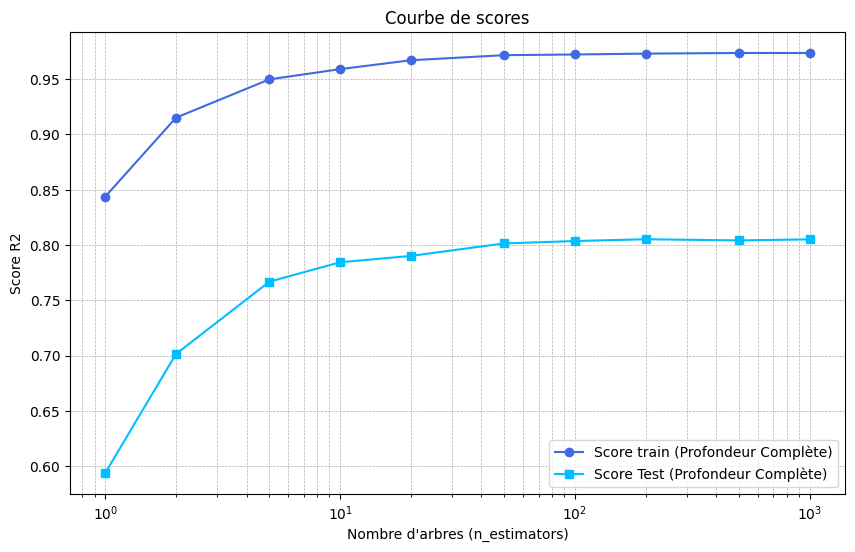

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, default_train_mean, 'o-',
         label='Score train (Profondeur Complète)', color='royalblue')
plt.plot(n_estimators, default_test_mean, 's-',
         label='Score Test (Profondeur Complète)', color='deepskyblue')

plt.title('Courbe de scores')
plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel('Score R2')
plt.xscale('log')
plt.legend(loc='best', fontsize=10)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

Les 2 scores atteignent un plateau

Réponse Q3: b) e)

In [17]:
###QUESTION 4

train_scores_5, test_scores_5 = validation_curve(
    RandomForestRegressor(random_state=0, max_depth=5),
    data, target,
    param_name="n_estimators",
    param_range=n_estimators,
    cv=10,
    scoring="r2",
)

depth5_train_mean = np.mean(train_scores_5, axis=1)
depth5_test_mean = np.mean(test_scores_5, axis=1)

print("N_estimators", n_estimators)
print("Mean Train Scores", depth5_train_mean)
print("Mean Test Scores", depth5_test_mean)
print("Mean Train Scores", default_train_mean)
print("Mean Test Scores", default_test_mean)


N_estimators [   1    2    5   10   20   50  100  200  500 1000]
Mean Train Scores [0.82363417 0.86646152 0.88696601 0.8950874  0.89969725 0.90323255
 0.90395147 0.90480355 0.90517693 0.90515391]
Mean Test Scores [0.71462582 0.75665702 0.77816612 0.79305879 0.80212391 0.81081494
 0.81393895 0.81617998 0.81582331 0.8164125 ]
Mean Train Scores [0.84374635 0.91509573 0.94981818 0.95903036 0.96706578 0.97166572
 0.97228981 0.97307673 0.97364496 0.97363665]
Mean Test Scores [0.5938381  0.701387   0.76686401 0.78438411 0.79013243 0.80146742
 0.80358609 0.80521083 0.80414542 0.8051176 ]


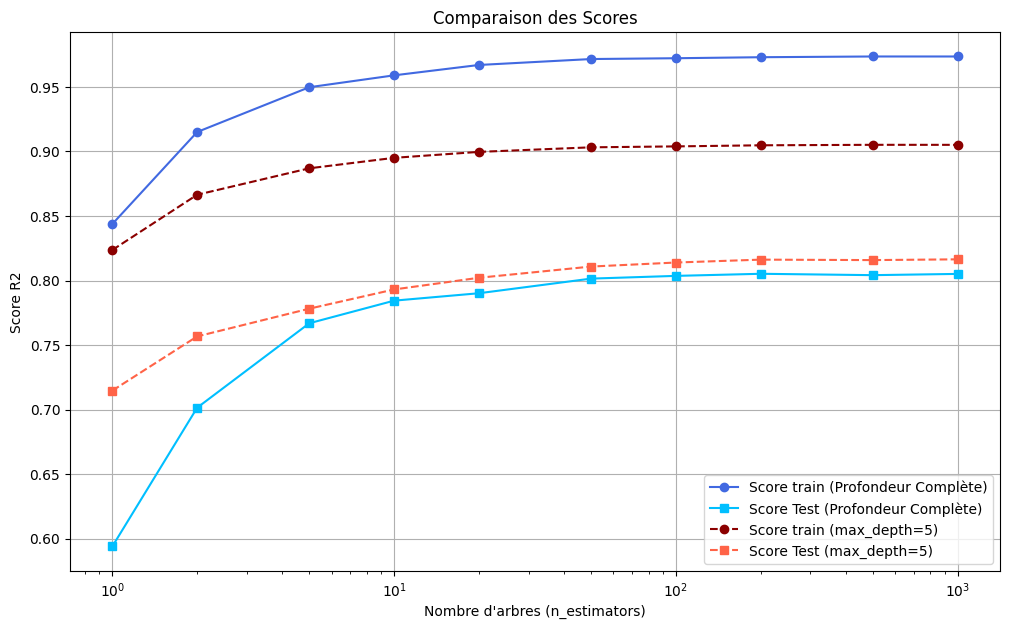

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))

plt.plot(n_estimators, default_train_mean, 'o-',
         label='Score train (Profondeur Complète)', color='royalblue')
plt.plot(n_estimators, default_test_mean, 's-',
         label='Score Test (Profondeur Complète)', color='deepskyblue')
plt.plot(n_estimators, depth5_train_mean, 'o--',
         label='Score train (max_depth=5)', color='darkred')
plt.plot(n_estimators, depth5_test_mean, 's--',
         label='Score Test (max_depth=5)', color='tomato')

plt.title('Comparaison des Scores')
plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel('Score R2')
plt.xscale('log')
plt.legend()
plt.grid()



Lorsque la profondeur est limitée, les scores train sont moins élevés. Pour autant ils sont plus élevés au moment du test.

Réponse Q4: b) c)

In [ ]:
###question5

Réponse Q5: a


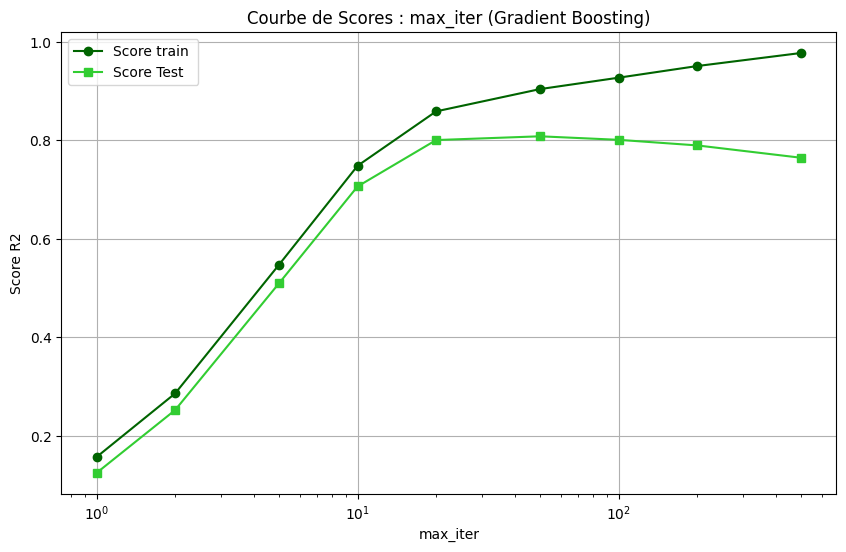

In [29]:
###question 6
max_iters = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

train_scores_gb, test_scores_gb = validation_curve(
    HistGradientBoostingRegressor(random_state=0),
    data, target,
    param_name="max_iter",
    param_range=max_iters,
    cv=10,
    scoring="r2",
)

gb_train_mean = np.mean(train_scores_gb, axis=1)
gb_test_mean = np.mean(test_scores_gb, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(max_iters, gb_train_mean, 'o-',
         label='Score train ', color='darkgreen')
plt.plot(max_iters, gb_test_mean, 's-',
         label='Score Test ', color='limegreen')
plt.title('Courbe de Scores : max_iter (Gradient Boosting)')
plt.xlabel("max_iter")
plt.ylabel('Score R2')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

for a small number of trees (between 5 and 10 trees), the gradient boosting model behave differently to the random forest algorithm: both the train and test scores are small

 with a large number of trees (> 100 trees) adding more trees in the ensemble causes the gradient boosting model overfit (increasing the gap between the train score and  test score)

 Réponse Q6: b) c)